In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data//evaluations.csv', delimiter='|', dtype={"config": str})
data

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
0,1,prompt_1.log,2025-07-22 12:37:47,2025-07-22 12:51:23,13min 36sec,816,False,success,False,28992,1008,30000,6,1138414,48205,1186619,69,75,0111,Create a simple web app called Plant Care Trac...
1,1,prompt_1.log,2025-07-23 13:50:15,2025-07-23 14:01:13,10min 58sec,658,False,success,False,20933,982,21915,6,962658,39613,1002271,77,83,1011,Create a simple web app called Plant Care Trac...
2,2,prompt_2.log,2025-07-22 21:51:03,2025-07-22 22:01:22,10min 19sec,619,False,success,False,27907,1054,28961,6,962959,33413,996372,61,67,0111,Make a Roommate Chore Wheel that randomly assi...
3,2,prompt_2.log,2025-07-23 14:08:41,2025-07-23 14:23:19,14min 38sec,878,False,success,False,29731,889,30620,6,2236555,45924,2282479,123,129,1011,Make a Roommate Chore Wheel that randomly assi...
4,3,prompt_3.log,2025-07-23 11:00:35,2025-07-23 11:13:03,12min 28sec,748,False,success,False,22660,950,23610,6,1251805,37280,1289085,109,115,0111,Build a dashboard to monitor car maintenance h...
5,3,prompt_3.log,2025-07-23 14:31:22,2025-07-23 14:42:34,11min 12sec,672,False,success,False,39318,1537,40855,6,1326890,43026,1369916,68,74,1011,Build a dashboard to monitor car maintenance h...
6,4,prompt_4.log,2025-07-23 13:51:44,2025-07-23 13:59:35,7min 51sec,471,False,success,False,22832,1022,23854,6,403567,21777,425344,45,51,0111,Build a simple web app that suggests if tomorr...
7,4,prompt_4.log,2025-07-23 14:53:35,2025-07-23 15:02:08,8min 33sec,513,False,success,False,26495,1266,27761,6,500614,26013,526627,40,46,1011,Build a simple web app that suggests if tomorr...
8,5,prompt_5.log,2025-07-23 15:07:38,2025-07-23 15:17:43,10min 05sec,605,False,success,False,25118,647,25765,6,1274113,37468,1311581,70,76,1011,Build a currency conversion app that takes an ...
9,5,prompt_5.log,2025-07-23 05:41:25,2025-07-23 05:51:04,9min 39sec,579,False,success,False,19322,1043,20365,6,513263,23001,536264,66,72,0111,Build a currency conversion app that takes an ...


In [5]:
data_group = data.groupby('config')
data_group.get_group("0111")

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
0,1,prompt_1.log,2025-07-22 12:37:47,2025-07-22 12:51:23,13min 36sec,816,False,success,False,28992,1008,30000,6,1138414,48205,1186619,69,75,0111,Create a simple web app called Plant Care Trac...
2,2,prompt_2.log,2025-07-22 21:51:03,2025-07-22 22:01:22,10min 19sec,619,False,success,False,27907,1054,28961,6,962959,33413,996372,61,67,0111,Make a Roommate Chore Wheel that randomly assi...
4,3,prompt_3.log,2025-07-23 11:00:35,2025-07-23 11:13:03,12min 28sec,748,False,success,False,22660,950,23610,6,1251805,37280,1289085,109,115,0111,Build a dashboard to monitor car maintenance h...
6,4,prompt_4.log,2025-07-23 13:51:44,2025-07-23 13:59:35,7min 51sec,471,False,success,False,22832,1022,23854,6,403567,21777,425344,45,51,0111,Build a simple web app that suggests if tomorr...
9,5,prompt_5.log,2025-07-23 05:41:25,2025-07-23 05:51:04,9min 39sec,579,False,success,False,19322,1043,20365,6,513263,23001,536264,66,72,0111,Build a currency conversion app that takes an ...
10,6,prompt_6.log,2025-07-23 20:42:13,2025-07-23 20:51:24,9min 11sec,551,False,success,False,20048,872,20920,6,698631,30699,729330,59,65,0111,Generate a Streamlit app called Movie Watchlis...
13,7,prompt_7.log,2025-07-23 21:09:13,2025-07-23 21:20:05,10min 52sec,652,False,success,False,23388,624,24012,6,1013475,26529,1040004,70,76,0111,Build a Classic Snake Game with pygame and sca...
18,8,prompt_8.log,2025-07-23 21:24:27,2025-07-23 21:40:09,15min 42sec,942,False,success,False,34295,1072,35367,7,2875965,56271,2932236,102,109,0111,Generate Brick Breaker game using Pygame. Gene...
19,9,prompt_9.log,2025-07-23 21:45:09,2025-07-23 21:57:51,12min 42sec,762,False,success,False,27276,1108,28384,6,1363707,45636,1409343,66,72,0111,Generate a Memory Card Matching Game. create a...
22,10,prompt_10.log,2025-07-23 22:01:39,2025-07-23 22:08:53,7min 14sec,434,False,success,False,19042,879,19921,6,304812,18387,323199,42,48,0111,Write a Flask app called\u202fJoke Collector\u...


In [6]:
data_group.get_group("1111")

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
12,6,prompt_6.log,2025-07-22 21:22:25,2025-07-22 21:36:30,14min 05sec,845,False,success,False,21776,3013,24789,6,1119362,32300,1151662,69,75,1111,Generate a Streamlit app called Movie Watchlis...
15,7,prompt_7.log,2025-07-22 21:48:44,2025-07-22 22:05:00,16min 16sec,976,False,success,False,28834,866,29700,6,2010930,39817,2050747,88,94,1111,Build a Classic Snake Game with pygame and sca...
16,8,prompt_8.log,2025-07-22 23:35:38,2025-07-22 23:43:32,7min 54sec,474,False,success,False,21268,801,22069,6,396339,18814,415153,40,46,1111,Generate Brick Breaker game using Pygame. Gene...
21,9,prompt_9.log,2025-07-22 23:48:41,2025-07-22 23:55:11,6min 30sec,390,False,success,False,17134,813,17947,6,152306,16254,168560,28,34,1111,Generate a Memory Card Matching Game. create a...
24,10,prompt_10.log,2025-07-22 22:35:05,2025-07-22 22:42:38,7min 33sec,453,False,success,False,19960,988,20948,6,321914,15771,337685,47,53,1111,Write a Flask app called\u202fJoke Collector\u...


In [7]:
data_group.get_group("1011")

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
1,1,prompt_1.log,2025-07-23 13:50:15,2025-07-23 14:01:13,10min 58sec,658,False,success,False,20933,982,21915,6,962658,39613,1002271,77,83,1011,Create a simple web app called Plant Care Trac...
3,2,prompt_2.log,2025-07-23 14:08:41,2025-07-23 14:23:19,14min 38sec,878,False,success,False,29731,889,30620,6,2236555,45924,2282479,123,129,1011,Make a Roommate Chore Wheel that randomly assi...
5,3,prompt_3.log,2025-07-23 14:31:22,2025-07-23 14:42:34,11min 12sec,672,False,success,False,39318,1537,40855,6,1326890,43026,1369916,68,74,1011,Build a dashboard to monitor car maintenance h...
7,4,prompt_4.log,2025-07-23 14:53:35,2025-07-23 15:02:08,8min 33sec,513,False,success,False,26495,1266,27761,6,500614,26013,526627,40,46,1011,Build a simple web app that suggests if tomorr...
8,5,prompt_5.log,2025-07-23 15:07:38,2025-07-23 15:17:43,10min 05sec,605,False,success,False,25118,647,25765,6,1274113,37468,1311581,70,76,1011,Build a currency conversion app that takes an ...
11,6,prompt_6.log,2025-07-23 19:48:47,2025-07-23 19:55:17,6min 30sec,390,False,success,False,24823,642,25465,6,362750,22432,385182,37,43,1011,Generate a Streamlit app called Movie Watchlis...
14,7,prompt_7.log,2025-07-23 21:03:15,2025-07-23 21:10:49,7min 34sec,454,False,success,False,18760,463,19223,6,788854,25936,814790,56,62,1011,Build a Classic Snake Game with pygame and sca...
17,8,prompt_8.log,2025-07-23 20:02:33,2025-07-23 20:11:04,8min 31sec,511,False,success,False,35282,696,35978,6,551526,28471,579997,36,42,1011,Generate Brick Breaker game using Pygame. Gene...
20,9,prompt_9.log,2025-07-23 20:19:10,2025-07-23 20:28:42,9min 32sec,572,False,success,False,25639,821,26460,6,915043,33074,948117,69,75,1011,Generate a Memory Card Matching Game. create a...
23,10,prompt_10.log,2025-07-23 20:35:12,2025-07-23 20:43:35,8min 23sec,503,False,success,False,18948,1141,20089,6,643329,28209,671538,65,71,1011,Write a Flask app called\u202fJoke Collector\u...


In [8]:
success_rate = data_group['build_status'].apply(lambda x: (x == 'success').mean()).reset_index(name='success_rate')

success_rate

,config,success_rate
0,0111,0.800000
1,1011,0.933333
2,1111,1.000000


In [9]:
def time_to_seconds(t):
    match = re.match(r"(?:(\d+)min )?(\d+)sec", t)
    if match:
        minutes = int(match.group(1)) if match.group(1) else 0
        seconds = int(match.group(2))
        return minutes * 60 + seconds
    return None

In [10]:
data['gen_time_sec'] = data['gen_time'].apply(time_to_seconds)
data_group = data.groupby('config')

median_gen_time = data_group['gen_time_sec'].median().reset_index(name='median_gen_time_sec')
median_gen_time

,config,median_gen_time_sec
0,0111,748.0
1,1011,562.0
2,1111,474.0


In [11]:
performance_summary = pd.merge(success_rate, median_gen_time, on='config')

performance_summary = performance_summary.sort_values(by=['success_rate', 'median_gen_time_sec'], ascending=[False, True])

performance_summary

,config,success_rate,median_gen_time_sec
2,1111,1.000000,474.0
1,1011,0.933333,562.0
0,0111,0.800000,748.0


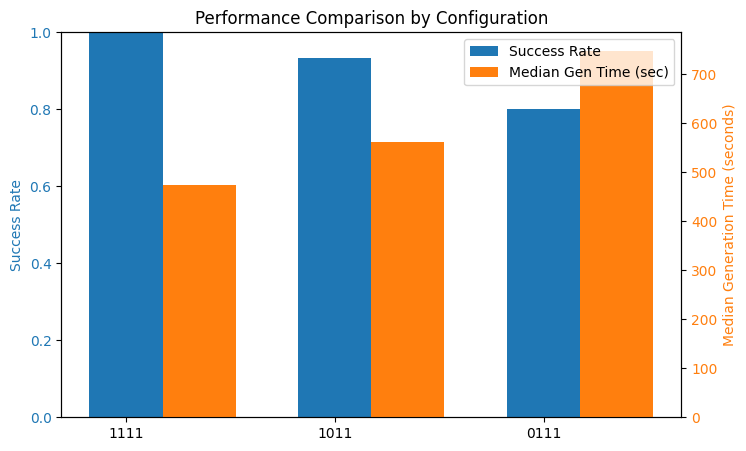

In [12]:
fig, ax1 = plt.subplots(figsize=(8, 5))

configs = performance_summary['config']
success_rates = performance_summary['success_rate']
avg_times = performance_summary['median_gen_time_sec']

bar_width = 0.35
index = range(len(configs))

bars1 = ax1.bar(index, success_rates, bar_width, label='Success Rate', color='tab:blue')
ax1.set_ylabel('Success Rate', color='tab:blue')
ax1.set_ylim(0, 1)
ax1.set_xticks(index)
ax1.set_xticklabels(configs)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], avg_times, bar_width, label='Median Gen Time (sec)', color='tab:orange')
ax2.set_ylabel('Median Generation Time (seconds)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Performance Comparison by Configuration')
plt.show()

#### Everything on: 
- On an average takes less time to execute, ~475 seconds (linters fix the errors instead of needing more API calls)
- Has highest success rate ~100%
- Generated web-applications have almost none or minor bugs.

#### Linter checks off:
- On average takes ~750 seconds to execute
- Success rate is around 80%
- Generated web-applications have minor to moderate bugs.

#### Type checks off:
- On average takes ~562 seconds to execute
- Success rate is around 90%
- Successfully generated web applications for most prompts, except for the one involving Pygame, which was not implemented, and encountered difficulties adding items in prompt_15.